#  Assignment_4: Simple_Linear_Regression

1) Delivery_time -> Predict delivery time using sorting time 2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple Linear Regression Model By Performing EDA and do Necessary Transformations
and Select The best Model Using R or Python

# 1) Delivery_time-> Predict Delivery Time using sorting Time

# EDA

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\delivery_time.csv")
print("\n Shape is                   : \n", df.shape)
print("\n Data Types                   : \n", df.dtypes)
print("\n Null values are                  : \n", df.isna().sum())
print("\n Discriptive Analysis of data       : \n", df.describe())
print("\n Data Info                       : \n", df.info())
print("Columns names                      : \n", df.columns)

#Rename Columns :

df["Delivery_Time"]=df["Delivery Time"].rename("Delivery_Time")
df["Sorting_Time"]= df["Sorting Time"].rename("Sorting_time")

#Drop Columns :
df.drop(["Delivery Time", "Sorting Time"], axis=1,inplace=True)
#Drop null values From the data
df=df.dropna()
df


 Shape is                   : 
 (21, 2)

 Data Types                   : 
 Delivery Time    float64
Sorting Time       int64
dtype: object

 Null values are                  : 
 Delivery Time    0
Sorting Time     0
dtype: int64

 Discriptive Analysis of data       : 
        Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes

 Data Info                       : 
 None
Columns names                      : 


,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation

In [3]:
print(df.corr())
#Value Is 0.825997 so we can Say Delivery Time Time and Sorting Time Are Positively

               Delivery_Time  Sorting_Time
Delivery_Time       1.000000      0.825997
Sorting_Time        0.825997      1.000000


# Data Visualization

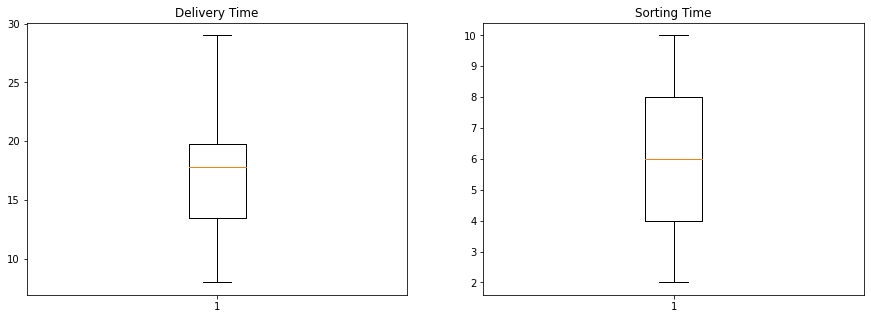

In [4]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0]. boxplot(df['Delivery_Time']);ax[0].set_title("Delivery Time")
ax[1].boxplot(df['Sorting_Time']);ax[1].set_title("Sorting Time")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


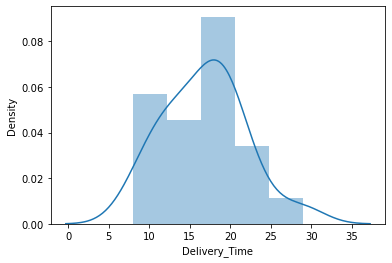

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


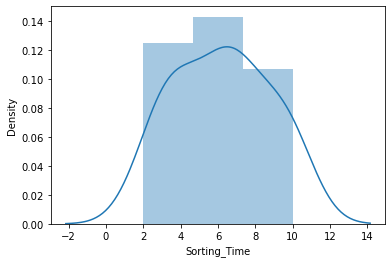

In [5]:
sns.distplot(df["Delivery_Time"])
plt.show()
sns.distplot(df["Sorting_Time"])
plt.show()

# Model Building

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

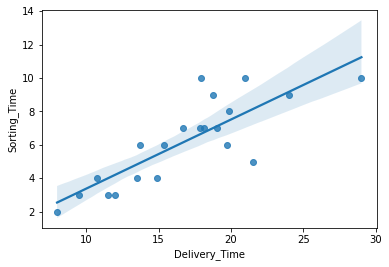

In [6]:
sns.regplot(x='Delivery_Time',y='Sorting_Time',data=df)

# Model Fitting

In [7]:
model=smf.ols("Delivery_Time~Sorting_Time",data=df).fit()

# Coefficient

In [8]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [9]:
#t values and p values:
print("t value is:\n",model.tvalues,'\n',"p Value is:\n",model.pvalues)

t value is:
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 p Value is:
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [10]:
#Coefficient Of determination: R squared Values
print("R squared Value is:\n",model.rsquared,'\n',"R squared_adjacent value is:\n", model.rsquared_adj)
# R sqaured value = 0.68,we can say line is good

R squared Value is:
 0.6822714748417231 
 R squared_adjacent value is:
 0.6655489208860244


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        16:26:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Prediction

In [12]:
new_data= pd.Series([6,8])
new_data
data_pred=pd.DataFrame(new_data, columns=["Sorting_Time"])
data_pred

,Sorting_Time
0,6
1,8


In [13]:
model.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

In [14]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Transformation For Continuous Variable

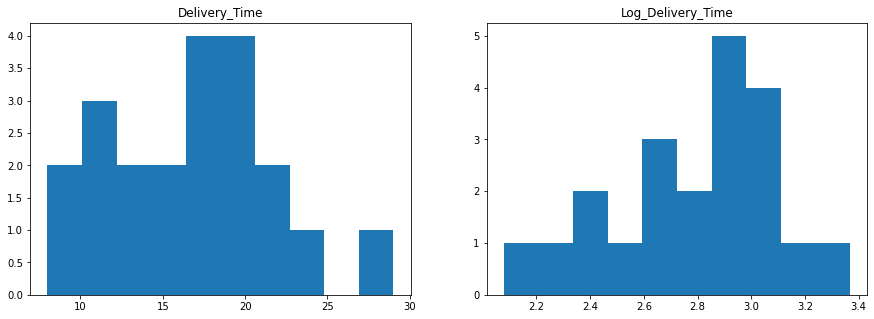

In [17]:
# log trasformation :
df['log_YE']= np.log(df["Delivery_Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['Delivery_Time']);ax[0].set_title("Delivery_Time")
ax[1].hist(df['log_YE']);ax[1].set_title("Log_Delivery_Time")
plt.show()

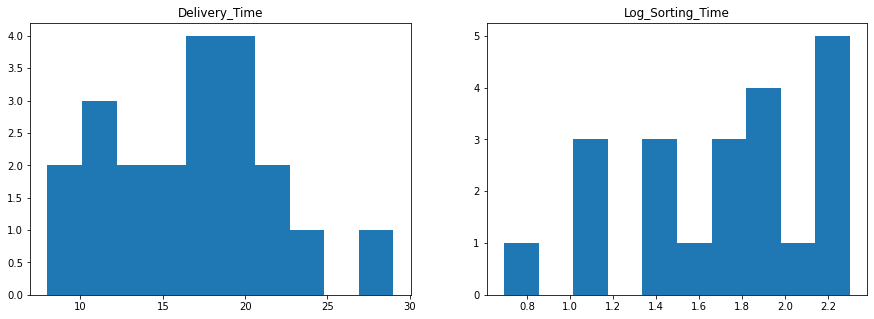

In [18]:
# log trasformation :
df['log_YE']= np.log(df["Sorting_Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['Delivery_Time']);ax[0].set_title("Delivery_Time")
ax[1].hist(df['log_YE']);ax[1].set_title("Log_Sorting_Time")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


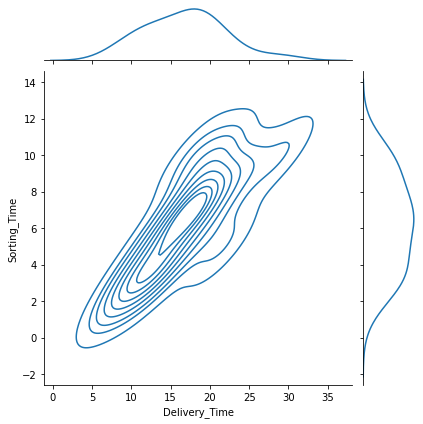

In [21]:
sns.jointplot(df['Delivery_Time'],df['Sorting_Time'], kind='kde')
plt.show()

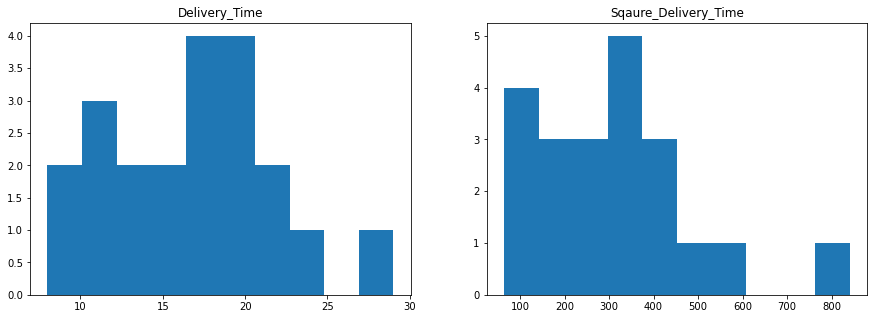

In [23]:
# Square_Transformation
df['sqr_DT']= np.square(df["Delivery_Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['Delivery_Time']);ax[0].set_title("Delivery_Time")
ax[1].hist(df['sqr_DT']);ax[1].set_title("Sqaure_Delivery_Time")
plt.show()

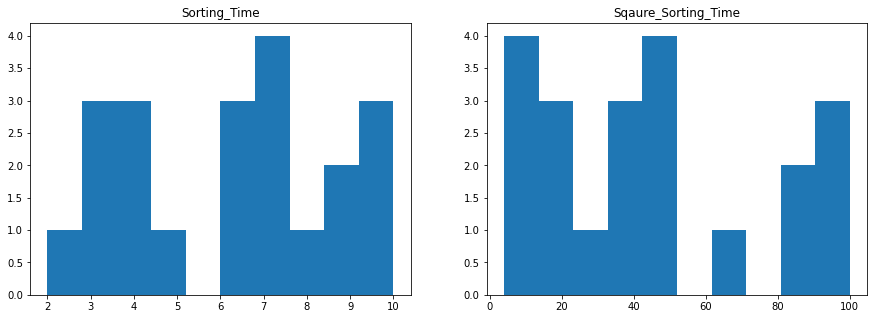

In [24]:
#square-Root_Transformation
df['sqr_S_T']= np.square(df["Sorting_Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['Sorting_Time']);ax[0].set_title("Sorting_Time")
ax[1].hist(df['sqr_S_T']);ax[1].set_title("Sqaure_Sorting_Time")
plt.show()

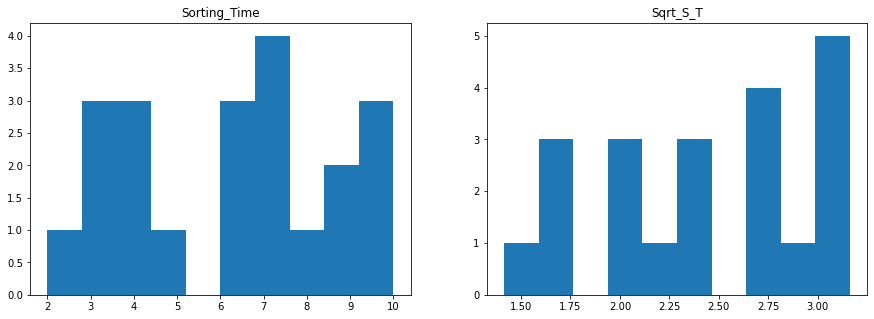

In [25]:
df['sqrt_S_T']= np.sqrt(df["Sorting_Time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['Sorting_Time']);ax[0].set_title("Sorting_Time")
ax[1].hist(df['sqrt_S_T']);ax[1].set_title("Sqrt_S_T")
plt.show()

# 2) Salary_Hike -> Build a prediction Model For Salary_Hike

# EDA

In [ ]:
data = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Salary_Data.csv")
print("\n Shape is                         : \n", data.shape)
print("\n Data Types                       :\n", data.dtypes)
print("\n Null values are                  :\n", data.isna().sum())
print("\n Discriptive Analysis Of Data     :\n", data.describe())
print("\n Data Info                        :\n", data.info())
print("\n Columns names                       :\n", data.columns)

In [ ]:
data.head()

# Correlation

In [ ]:
print("\n Correlation Between data Points :\n", data.corr())
# Therefore Value Is 0.978242 we can say, correlation Between years Experience and The salary is in Positive

# Data Visualization

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].boxplot(data['YearsExperience']);ax[0].set_title("Years Experience")
ax[1].boxplot(data['Salary']);ax[1].set_title("Salary")
plt.show()

# Transformation For Continuous Variable :

In [ ]:
# Log Transformation
data['log_YE']= np.log(data["YearsExperience"])
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['YearsExperience']);ax[0].set_title("Years Experience")
ax[1].hist(data['log_YE']);ax[1].set_title("Log_Years_Experience")
plt.show()

In [ ]:
data['log_S']= np.log(data["Salary"])

fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].hist(data['YearsExperience']);ax[0].set_title("Years Experience")
ax[1].hist(data['log_S']);ax[1].set_title("Log_Salary")
plt.show()

In [ ]:
sns.jointplot(data['YearsExperience'],data['Salary'],kind='kde')
plt.show()

In [ ]:
# Square_Transformation
data['sqr_YE']= np.square(data["YearsExperience"])
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['YearsExperience']);ax[0].set_title("Years Experience")
ax[1].hist(data['sqr_YE']);ax[1].set_title("Square_Years_Experience")
plt.show()


In [ ]:
data['sqr_S']= np.square(data["Salary"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['Salary']);ax[0].set_title("Salary")
ax[1].hist(data['sqr_S']);ax[1].set_title("Square_Salary")
plt.show()


In [ ]:
# Square-root_Transformation

data['sqrt_YE']= np.sqrt(data["YearsExperience"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['YearsExperience']);ax[0].set_title("Years Experience")
ax[1].hist(data['sqrt_YE']);ax[1].set_title("Sqrt_Years_Experience")
plt.show()

In [ ]:
data['sqrt_S']= np.sqrt(data["Salary"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(data['Salary']);ax[0].set_title("Salary")
ax[1].hist(data['sqrt_S']);ax[1].set_title("Sqrt_Salary")
plt.show()

In [ ]:
from sklearn.preprocessing import scale
df = data.values
df1 = scale(df) #Used to standardized the dataset
sns.displot(df1, kind='kde')
plt.show()

In [ ]:
# Normalize Data set
from sklearn.preprocessing import normalize
df1= normalize(data)
plt.hist(df1)
plt.show()
#df1

# Model Building

In [ ]:
sns.regplot(x="Salary", y="YearsExperience", data=data)

# Model Fitting

In [ ]:
#Fitting Linear Regression Model
model = smf.ols("Salary~YearsExperience",data=data).fit()

# Model Testing :

In [ ]:
#Coefficients
dir(model)
model.params

In [ ]:
# t values and p values
print("t values are :\n", model.tvalues, '\n', "p values are :\n",model.pvalues)

In [ ]:
#Coefficient Of Determination: R squared Values
print("R Squared value is:", model.rsquared, "\nR Squared_adjacent value is:", model.rsquared_adj)
#R squared VALUE IS 0.95 

In [ ]:
model.summary()

# Model Prediction:

In [ ]:
new_data= pd.Series([4,5])
new_data
data_pred=pd.DataFrame(new_data, columns=["YearsExperience"])
data_pred

In [ ]:
model.predict(data_pred)

In [ ]:
data